In [9]:
#Cargar librerías
import pandas as pd
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

In [10]:
#Carga de datos
df = pd.read_csv('/Users/iansc/Documentos/DataAnalyst/GitHub/tripleten/Análisis de venta de Videojuegos/games.csv')

In [11]:
df.info() #Analizamos los datos y su composición. Podemos revisar a partir de ahora cuántos nulos hay en cada columna.
print()
print()
'''
Existen 2 ausentes en 'Name'
Existen 269 ausentes en 'Year_of_Release'
Existen 2 ausentes en 'Genre'
Existen 8,578 ausentes en 'Critic_Score'
Existen 6,701 ausentes en 'User_Score'
Existen 6,766 ausentes en 'Rating'
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB




"\nExisten 2 ausentes en 'Name'\nExisten 269 ausentes en 'Year_of_Release'\nExisten 2 ausentes en 'Genre'\nExisten 8,578 ausentes en 'Critic_Score'\nExisten 6,701 ausentes en 'User_Score'\nExisten 6,766 ausentes en 'Rating'\n"

In [12]:
#Hacemos un cambio en los nombres de las columnas para que sean minúsculas y snake_case
df.columns = df.columns.str.lower()


In [13]:
#Cambiamos los tipos de datos necesarios en cada columna
df_missing_year = df[df['year_of_release'].isnull()] #Revisamos las filas que tienen valores ausentes en year_of_release, para buscar coincidencias.


df['year_of_release'] = df['year_of_release'].fillna(0) #Rellenamos los ausente de year_of_release con el valor 0, ya que no se va a realizar operaciones aritméticas con las fechas. No se encontró ningun patrón en los faltantes de años. Son juegos de género diferente, diferente plataforma. Quizás esos datos no se pudieron recabar.
df['year_of_release'] = df['year_of_release'].astype('int') #Hacemos el cambio de tipo de float a int en la fecha ya que no tiene por qué ser un número decimal.



In [14]:
df['name'] = df['name'].fillna('Unknown') #Rellenamos los valores ausentes de nombres de los juegos por Unknown
df_genre_nan = df[df['genre'].isnull()] #Filtramos para revisar las filas con valores ausentes en 'genre'
df['genre'] = df['genre'].fillna('Unknown') #Llenamos los valores ausentes de género con Unknown
'''
Los juegos que tienen valor ausente en nombre y género son los mismos, aparentemente estos datos no pudieron ser recabados porque el juego es muy viejo.
quizás por eso los datos no existen o están incompletos.
'''

'\nLos juegos que tienen valor ausente en nombre y género son los mismos, aparentemente estos datos no pudieron ser recabados porque el juego es muy viejo.\nquizás por eso los datos no existen o están incompletos.\n'

#Dejaremos la columna de 'critic_score' sin rellenar los valores ausentes, ya que el tipo de datos es float, lo cuál nos sirve para poder hacer operaciones y análisis. Si cambiamos los valores, a 0 o por la mediana, ya que son demasiados los faltantes, podrían tener un cambio significativo en el análisis

In [15]:
tbd_lines = df[df['user_score'] == 'tbd'] #Filtrando de esta manera, encontré que hay 2424 filas que tienen user_score tbd
tbd_lines_year = df[(df['user_score'] == 'tbd') & ((df['year_of_release'] < 2013) & (df['year_of_release'] > 2000 ))] #Filtrado para hacer pruebas de relación entre tbd y años


#Haciendo pruebas, encontré que el lapso en el que más tbd's hay es entre los años 2000 y 2013. /2216 filas de las 2424/ Puede ser que esa década haya sido difícil de estimar calificaciones de usuarios.

In [16]:
df['user_score'] = pd.to_numeric(df['user_score'],errors = 'coerce') #Convertimos la columna user_score a float
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##Debido a que la columna user_score era object, tuvimos que convertirla a float, debido a que la calificación si utiliza decimales, sin embargo tuvimos que usar to_numeric, debido a los valores tbd que tenía. así logramos convertir el string que había en valores ausentes. A pesar de que los ausentes son un gran cantidad, no podemos llenarlos con media o mediana, ya que la calificación no es un valor cuantitativo de una población en general, sino un valor único de cada juego. Tendremos que analizar con los valores que tenemos, en cuanto a calificaciones de usuarios.

In [17]:
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales'] #Se agrega el total de las ventas de cada juego en una columna total_sales
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [18]:
# Cuántos juegos fueron lanzados en cada año.
df_no_year_0 = df[df['year_of_release'] != 0] #Filtramos para que no aparezca ningún juego en año desconocido que en este caso desconocido es 0
games_per_year = df_no_year_0.groupby('year_of_release')['name'].count() #Realizamos una agrupación para ver cuántos juegos salieron en cada año
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

## Hay un crecimiento exponencial en la creación de juegos desde 1995 hasta 2009. A partir de 2009 empezaron a reducirse los lanzamientos de juegos.

In [19]:
total_sales_on_platform = df.groupby('platform')['total_sales'].sum() #Agrupación del total de ventas por cada plataforma
total_sales_on_platform.sort_values(ascending= False) #Ordenamos los valores de las ventas para que tengamos en primer lugar las ventas más altas

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [20]:
top_10_sales_platforms = ['PS2', 'X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC'] #Lista de consolas bestsellers
df_top_10_sales = df[df['platform'].isin(top_10_sales_platforms)] #Filtramos para que solo aparezcan las filas de esas plataformas
df_top_10_sales_from_2002 = df[df['year_of_release'] > 1999] #Filtramos desde el año 2000 para hacer un pronóstico del futuro

top_10_sales_by_year = df_top_10_sales_from_2002.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum')#Creamos una tabla dinámica para visualizar los datos de ventas por plataforma por año
top_10_sales_by_year


year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Una consola tiene aproximadamente una vida remunerante de entre 10 a 11 años.

*Parece un patrón que tres años después del mejor año en ventas de una consola, comienzan a bajar las ventas muy significativamente.

*No es un patrón, ya que tiene un poco de variación, pero las compañías renuevan sus consolas aproximadamente cada 5 a 7 años.

*Las consolas que tienen auge de ventas en los últimos 3 años son: PS4, 3DS y XOne.

*El PS4 parece haber tenido su mejor año en 2015, así que para 2017 comenzará a bajar sus ventas y podemos darle una vida de remuneración hasta 2018, quizás 2019. Podemos esperar el PS5, quizás alrededor de esos años.

*El XOne es una consola que lidera en los últimos 3 años, sin embargo en 2015 parece que tuvo su mejor año, ya que en 2016 las ventas se redujeron más del 50%. Todo indicaría que también comienza su declive de 3 años y en 2017 tendrá otro bajón de ventas. Microsoft tendrá que implementar estrategias para potenciarlas o puede esperarse una nueva consola aproximadamente en 2018 o 2019.

*El 3DS parece ser una consola que a pesar de que sus ventas han bajado, no ha tenido una caída tan significativa y lleva varios años con número estables. Dejando de lado que también está en declive, aunque menos significativo, parece ser la consola portátil más rentable del mercado.

*El Wii es una consola que ya no tiene futuro, sin embargo tuvo un hit de ventas en su año de estreno en 2006 y desde entonces generó ventas masivas por otros 4 años más hasta 2010.

*Su evolución, el WiiU no fue tan aceptado, pues en su lanzamiento en 2012, la gente todavía prefería comprar juegos de su predecesor. Es una consola que no pinta nada bien, ya que su mejor año fue 2014 y para 2016 sus ventas se han reducido en una gran cantidad. Para 2017 la consola estará por los suelos.
Nintendo tendrá que optar por nueva consola en 2017 o por tarde en 2018.

<Axes: title={'center': 'Ventas totales por plataforma'}, xlabel='Plataformas', ylabel='Ventas Totales en Millones de dólares'>

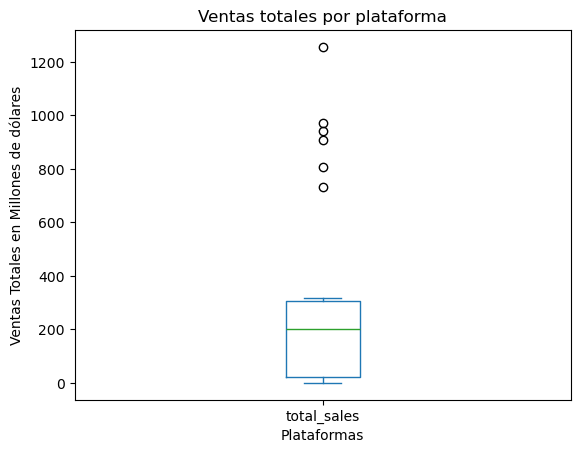

In [21]:
#Gráfica de caja de ventas globales por plataforma
total_sales_on_platform.plot(kind='box', title = 'Ventas totales por plataforma', xlabel = 'Plataformas', ylabel = 'Ventas Totales en Millones de dólares')

##La media de las ventas se encuentra por los 200 millones y podemos observar que no hay mucha distribución en la mayoría de las ventas, pues incluso los bigotes del diagrama están pegados al rango intercuartílico. Sin embargo, hay unos cuántos datos sesgados que pertenecen a las plataformas que se han destacado en ventas a lo largo de los años.

La correlación entre calificación de críticos y total de ventas es de 0.3937358653072587


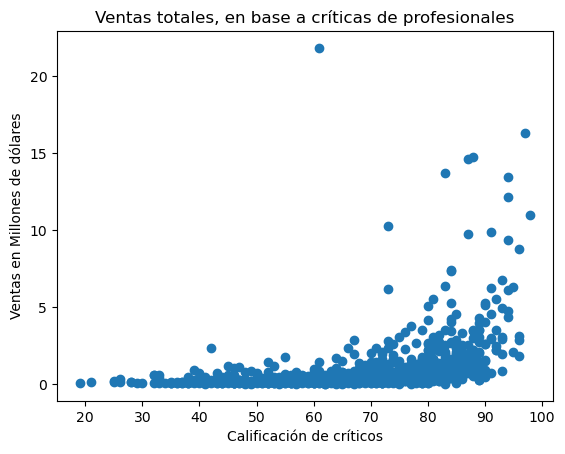

In [22]:
df_x360_only = df[df['platform'] == 'X360'] #Filtramos para que solo aparezcan filas de la consola x360

#A continuación creamos los parámetros para nuestro gráfico de dispersión
plt.scatter(df_x360_only['critic_score'], df_x360_only['total_sales']);
plt.xlabel('Calificación de críticos')
plt.ylabel('Ventas en Millones de dólares')
plt.title('Ventas totales, en base a críticas de profesionales')
plt.show

#Por último detectamos el nivel de correlación entre los dos valores
correlacion = df_x360_only['critic_score'].corr(df_x360_only['total_sales'])

print(f'La correlación entre calificación de críticos y total de ventas es de {correlacion}')

##Esto nos indica que hay una ligera correlación entre críticas de profesionales y ventas, sin embargo no es muy significativa.

La correlación entre calificación de usuarios y total de ventas es de 0.1144588297845418


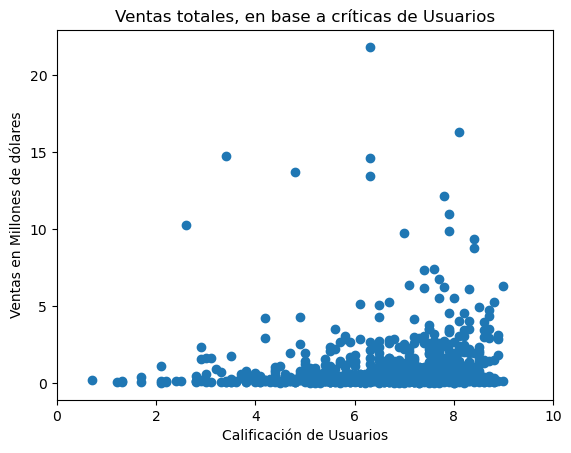

In [23]:
df_x360_only = df[df['platform'] == 'X360'] #Filtramos para que solo aparezcan filas de la consola x360

#A continuación creamos los parámetros para nuestro gráfico de dispersión
plt.scatter(df_x360_only['user_score'], df_x360_only['total_sales']);
plt.xlabel('Calificación de Usuarios')
plt.ylabel('Ventas en Millones de dólares')
plt.title('Ventas totales, en base a críticas de Usuarios')
plt.xlim(0,10)
plt.show

#Por último detectamos el nivel de correlación entre los dos valores
correlacion = df_x360_only['user_score'].corr(df_x360_only['total_sales'])

print(f'La correlación entre calificación de usuarios y total de ventas es de {correlacion}')

## La correlación entre las calificaciones de usuarios y ventas totales es aún menor que la de ventas con críticas profesionales. Esto nos indica que básicamente no es relevante la opinión de los usuarios en cuanto a las ventas que se puedan reflejar. Quizás por la subjetividad de los usuarios.

La correlación entre calificación de críticos y total de ventas es de 0.1775598880608995


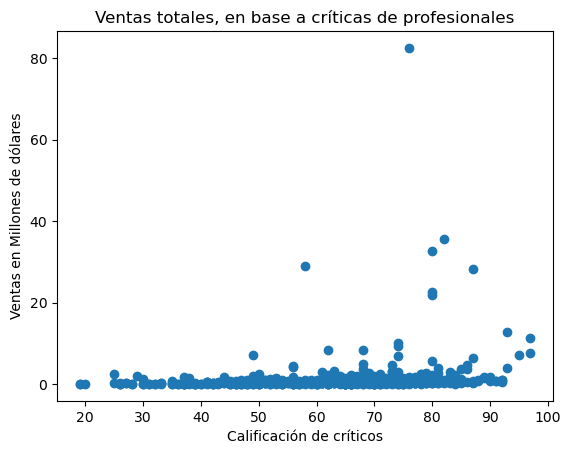

In [24]:
df_Wii_only = df[df['platform'] == 'Wii'] #Filtramos para que solo aparezcan filas de la consola x360

#A continuación creamos los parámetros para nuestro gráfico de dispersión
plt.scatter(df_Wii_only['critic_score'], df_Wii_only['total_sales']);
plt.xlabel('Calificación de críticos')
plt.ylabel('Ventas en Millones de dólares')
plt.title('Ventas totales, en base a críticas de profesionales')
plt.show

#Por último detectamos el nivel de correlación entre los dos valores
correlacion = df_Wii_only['critic_score'].corr(df_Wii_only['total_sales'])

print(f'La correlación entre calificación de críticos y total de ventas es de {correlacion}')

## Hacemos la misma relación de ventas en base a calificación de críticas para Wii, ya que fue la más significativa con x360. Aparentemente en Wii, no importan las críticas de los profesionales, hubo varios juegos con gran cantidad de ventas a pesar que la calificación no fuera tan buena.

##Así que esta relación puede variar entre plataformas.

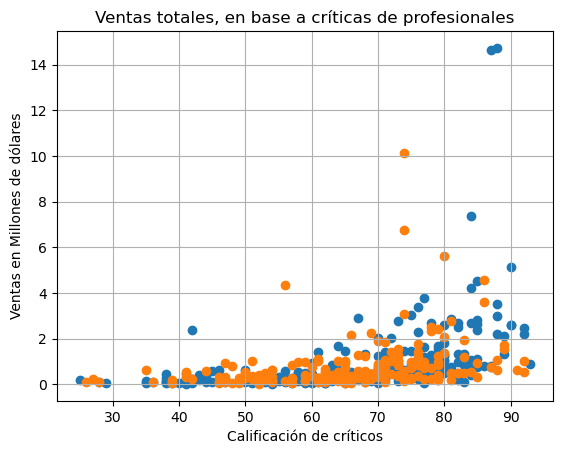

In [36]:
games_wii_and_360 = df_x360_only.merge(df_Wii_only, on='name', how='inner') #Ahora creamos un merge para juntar un dataframe de los juegos compartidos de x360 y wii

#Creamos nuestro gráfico de dispersión ahora con 2 valores, ventas en base a calificación de críticos de juegos compartidos entre Wii y X360
plt.scatter(games_wii_and_360['critic_score_x'], games_wii_and_360['total_sales_x']); #Xbox360
plt.scatter(games_wii_and_360['critic_score_y'], games_wii_and_360['total_sales_y']); # Wii
plt.xlabel('Calificación de críticos')
plt.ylabel('Ventas en Millones de dólares')
plt.title('Ventas totales, en base a críticas de profesionales')


plt.grid()
plt.show()


## Podemos notar que la dispersión es bastante parecida, aunque x360 gana la batalla en ventas de los juegos compartidos con mejores números y parece ser que con mejores calificaciones también.

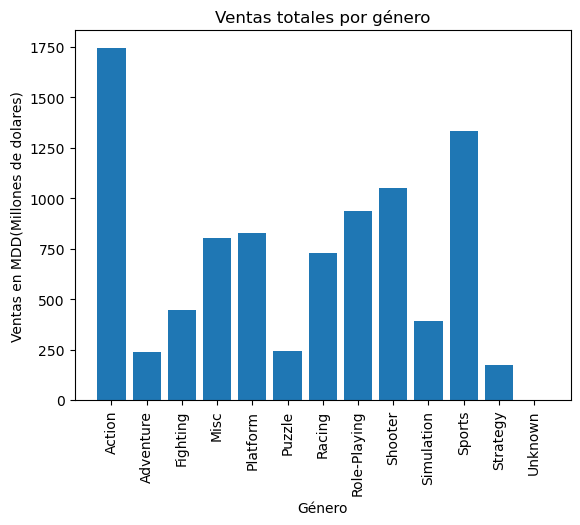

In [26]:
sales_by_genre = df.groupby('genre')['total_sales'].sum()
sales_by_genre.sort_values(ascending = False)
plt.bar(sales_by_genre.index, sales_by_genre.values)
plt.xticks(rotation= 90)
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas en MDD(Millones de dolares)')
plt.show()

## Al parecer el género con mayores ventas es Action, seguido por Sports y luego por Shooter. Para generalizar, los géneros más vendidos son géneros con un tipo de juego mucho más dinámico en el que el usuario se encuentra en constante estímulo y hay mucho dinamismo. En cambio los géneros con menos ventas tienden a ser géneros con modos de juego más lento y menos dinámico.

In [27]:
#Creamos
print('Top 5 plataformas en Norte América:')
na_top5_platforms = df.groupby('platform')['na_sales'].sum().nlargest(5)
print(na_top5_platforms)
print()
print('Top 5 plataformas en Japón:')
jp_top5_platforms = df.groupby('platform')['jp_sales'].sum().nlargest(5)
print(jp_top5_platforms)
print()
print('Top 5 plataformas en Europa:')
eu_top5_platforms = df.groupby('platform')['eu_sales'].sum().nlargest(5)
print(eu_top5_platforms)



Top 5 plataformas en Norte América:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en Japón:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Top 5 plataformas en Europa:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


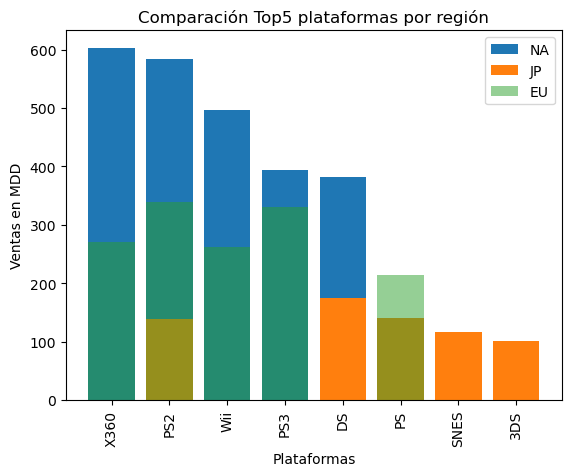

In [28]:
plt.bar(na_top5_platforms.index, na_top5_platforms.values)
plt.bar(jp_top5_platforms.index, jp_top5_platforms.values)
plt.bar(eu_top5_platforms.index, eu_top5_platforms.values, alpha = 0.5)
plt.legend(['NA','JP','EU'])
plt.title('Comparación Top5 plataformas por región')
plt.ylabel('Ventas en MDD')
plt.xlabel('Plataformas')
plt.xticks(rotation = 90)
plt.show()

## La mayor deducción que podemos hacer con este cotejo es que las consolas favoritas de Japón son las consolas portátiles. Ya que las ventas para DS fueron las más altas y para el 3DS no se quedó atrás. Parece ser que el interés de compra de Japón no es muy alto comparado con las otras dos regiones. Norte América se lleva la victoria en ventas, superando a las otras dos en todos los sentidos. Europa muestra un consumo similar a Norte América en consolas, sin embargo con ventas mucho menores. Otra afirmación podría ser que de este top, podemos considerar al PS y SNES como consolas vintage. Parece ser que Norte América no tuvo ningún interés en ese tipo de consolas.

In [29]:
esrb_sales_na = df.groupby('rating')['na_sales'].sum()
print('La relación del ESRB con las ventas en Norte América es:')
print(esrb_sales_na)
print()
esrb_sales_jp = df.groupby('rating')['jp_sales'].sum()
print('La relación del ESRB con las ventas en Japón es:')
print(esrb_sales_jp)
print()
esrb_sales_eu = df.groupby('rating')['eu_sales'].sum()
print('La relación del ESRB con las ventas en Europa es:')
print(esrb_sales_eu)

La relación del ESRB con las ventas en Norte América es:
rating
AO         1.26
E       1292.99
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64

La relación del ESRB con las ventas en Japón es:
rating
AO        0.00
E       198.11
E10+     40.20
EC        0.00
K-A       1.46
M        64.24
RP        0.00
T       151.40
Name: jp_sales, dtype: float64

La relación del ESRB con las ventas en Europa es:
rating
AO        0.61
E       710.25
E10+    188.52
EC        0.11
K-A       0.27
M       483.97
RP        0.08
T       427.03
Name: eu_sales, dtype: float64


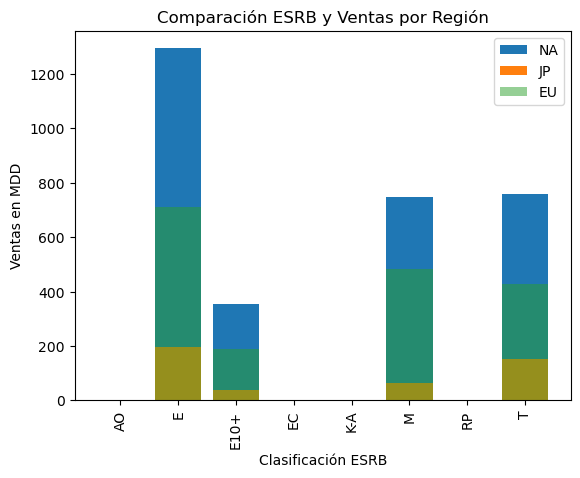

In [30]:
plt.bar(esrb_sales_na.index, esrb_sales_na.values)
plt.bar(esrb_sales_jp.index, esrb_sales_jp.values)
plt.bar(esrb_sales_eu.index, esrb_sales_eu.values, alpha = 0.5)
plt.legend(['NA','JP','EU'])
plt.title('Comparación ESRB y Ventas por Región')
plt.ylabel('Ventas en MDD')
plt.xlabel('Clasificación ESRB')
plt.xticks(rotation = 90)
plt.show()

##Al parecer las tres regiones comparten que la clasificación que más se vende es E.
##Podemos ver números muy parecidos en las clasificaciones T y M. Al parecer para las tres regiones, las clasificaciones más vendidas son E, M y T.
##Norte América tiene una similaridad muy significativa en las ventas de los juegos M y T.
##Europa tiene en primer lugar E, luego M y luego T, mientras que Japón tiene en primer lugar E, luego T y luego M.

In [31]:
#Extraemos los valores de calificaciones de usuarios de xone y pc
xone_userscore = df[df['platform'] == 'XOne']['user_score'].dropna()

pc_userscore = df[df['platform'] == 'PC']['user_score'].dropna()



In [32]:
#hipótesis nula = Los promedios de calificaciones por usuarios de Xone y PC son iguales
#Hipótesis alternativa = Los promedios de calificaciones por usuarios de Xone y PC son diferentes
alpha = 0.5

result = st.ttest_ind(xone_userscore, pc_userscore)

print('Valor P:', result.pvalue)

if (result.pvalue) < alpha:
  print('Rechazamos la hipótesis nula')
else:
  print('No podemos rechazar la hipótesis nula')


Valor P: 1.3896435533548827e-05
Rechazamos la hipótesis nula


In [33]:
#Filtramos para solo tener los datos de las calificaciones de los géneros action y sports. Borramos los valores ausentes para poder trabajar con las operaciones de probabilidad
action_userscore = df[df['genre'] == 'Action']['user_score'].dropna()
sports_userscore = df[df['genre'] == 'Sports']['user_score'].dropna()



In [34]:
#Hipótesis Nula = Los promedios de las calificaciones por usuarios de los géneros action y sports son los mismos
#Hipótesis Alternativa = Los promedios de las calificaciones por usuarios de los géneros action y sports son diferentes
from os import supports_effective_ids
alpha = 0.05

results2 = st.ttest_ind(action_userscore, sports_userscore, equal_var = False)

print('valor p =', results2.pvalue)

if(results2.pvalue < alpha):
  print('Rechazamos la hipótesis nula')
else:
  print('No podemos rechazar la hipótesis nula')


valor p = 0.11483818791498293
No podemos rechazar la hipótesis nula


##En ambos casos usamos el método de st.ttest_ind ya que comparamos el promedio para dos poblaciones diferentes.
##En la primera rechazamos la hipótesis nula ya que el valor de los promedios no es igual.
##En el segundo no pudimos rechazar la hipótesis nula ya que es muy probable que si extraemos valores aleatorios de las calificaciones para ambas poblaciones sean los mismos.

#Conclusión General
Para mis conclusiones generales, comienzo con el hecho de que Norte América es la región con mayor número de compras de videojuegos. Impulsar el mercado de juegos en esa zona puede ser muy provechoso. También podemos nutrir a Japón de más juegos portátiles y campañas retro, ya que son su mejor mercado. Europa sigue un patrón muy parecido a Norte América.

Es importante recalcar que las plataformas de videojuegos tienen cierta vida útil y después de unos 10 años comienzan a volverse obsoletas, por lo que se necesitan estrategias para innovar en el mercado de consolas, además de que la gente comienza a dejar de comprar juegos para cierta consola después de unos 3 o 4 años.

Llegamos a la conclusión que los géneros importan en la venta de videojuegos. Considero que mientras un juego sea más dinámico, activo y produzca más estímulos produce más ventas. También pareciera que la competitividad puede ser un factor que contribuya a que la jugabilidad sea más agradable al usuario. Por lo tanto, más ventas!


